# Library

In [1]:
# !pip install lightgbm


In [2]:
# !pip install xgboost


In [3]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import random


import os
import time
import datetime
import calendar

from sklearn.metrics import mean_squared_error


import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn import clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# from utils_model import * # expand later

In [124]:
np.set_seed(0)

AttributeError: module 'numpy' has no attribute 'set_seed'

# Data

In [482]:
data = pd.read_csv('train.csv')
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [483]:
data_test = pd.read_csv('test.csv')
data_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0


# Exploration

## Check NulL

In [94]:
data.shape

(11153, 22)

In [95]:
data[data.duplicated()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance


In [96]:
total_null = data.isnull().sum().sort_values(ascending=False).head(30) / data.shape[0]
total_null

Last_achievement_%                       0.00009
Achievement_above_100%_during3quartal    0.00009
Best Performance                         0.00000
number_of_dependences                    0.00000
job_duration_in_current_job_level        0.00000
person_level                             0.00000
job_duration_in_current_person_level     0.00000
job_duration_in_current_branch           0.00000
Employee_type                            0.00000
gender                                   0.00000
age                                      0.00000
marital_status_maried(Y/N)               0.00000
Education_level                          0.00000
GPA                                      0.00000
year_graduated                           0.00000
job_duration_from_training               0.00000
branch_rotation                          0.00000
job_rotation                             0.00000
assign_of_otherposition                  0.00000
annual_leave                             0.00000
sick_leaves         

In [97]:
data[data['Last_achievement_%'].isna()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [98]:
data['Last_achievement_%'].describe()

count    11152.000000
mean        72.234902
std         23.030421
min          4.510000
25%         56.650000
50%         71.675000
75%         88.172500
max        130.000000
Name: Last_achievement_%, dtype: float64

In [10]:
# data = data[~data['Last_achievement_%'].isna()]

## Check Var

In [11]:
check_idx_features = [0,22]

print(data.iloc[:,check_idx_features[0]:check_idx_features[1]].info())
print()
data.iloc[:,check_idx_features[0]:check_idx_features[1]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [12]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(exclude=['object']).describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


In [13]:
data[data['job_duration_in_current_person_level']==0].shape

(119, 22)

In [14]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(include=['object']).describe()

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
count,11153,11153,11153,11153,11153
unique,3,8,3,2,6
top,JG04,PG03,RM_type_A,Y,level_4
freq,10413,9655,7287,9501,9222


In [99]:
categ_data = data.select_dtypes(include=['object'])
categ_data.describe().iloc[1,:].sort_values(ascending=False)

person_level                  8
Education_level               6
Employee_type                 3
job_level                     3
marital_status_maried(Y/N)    2
Name: unique, dtype: object

25 is not that much cardinality number imo

In [100]:
print(categ_data.shape)

(11153, 5)


In [101]:
for col in categ_data.columns:
    print(pd.crosstab(categ_data[col],data['Best Performance']))
    
    print('===========\n')

Best Performance     0     1
job_level                   
JG03                28     8
JG04              8890  1523
JG05               598   106

Best Performance     0     1
person_level                
PG01                14     5
PG02                13     3
PG03              8233  1422
PG04               656   101
PG05               276    32
PG06               307    71
PG07                17     2
PG08                 0     1

Best Performance     0     1
Employee_type               
RM_type_A         6257  1030
RM_type_B         2842   538
RM_type_C          417    69

Best Performance               0     1
marital_status_maried(Y/N)            
N                           1392   260
Y                           8124  1377

Best Performance     0     1
Education_level             
level_0              1     0
level_1            113    27
level_2              4     0
level_3           1481   262
level_4           7880  1342
level_5             37     6



Categorical variable kinda mix between targets

In [18]:
# sns.distplot(num_data[num_data['Best Performance']==0].iloc[:,0],label='0')
# sns.distplot(num_data[num_data['Best Performance']==1].iloc[:,1],label='1')

In [19]:
# import plotly.figure_factory as ff
# fig = ff.create_distplot([num_data[num_data['Best Performance']==0].iloc[:,0],
#                          num_data[num_data['Best Performance']==1].iloc[:,0]], ['0','1'])
# fig.show()


(11153, 17)


E:\Anaconda3\envs\andre\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

E:\Anaconda3\envs\andre\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



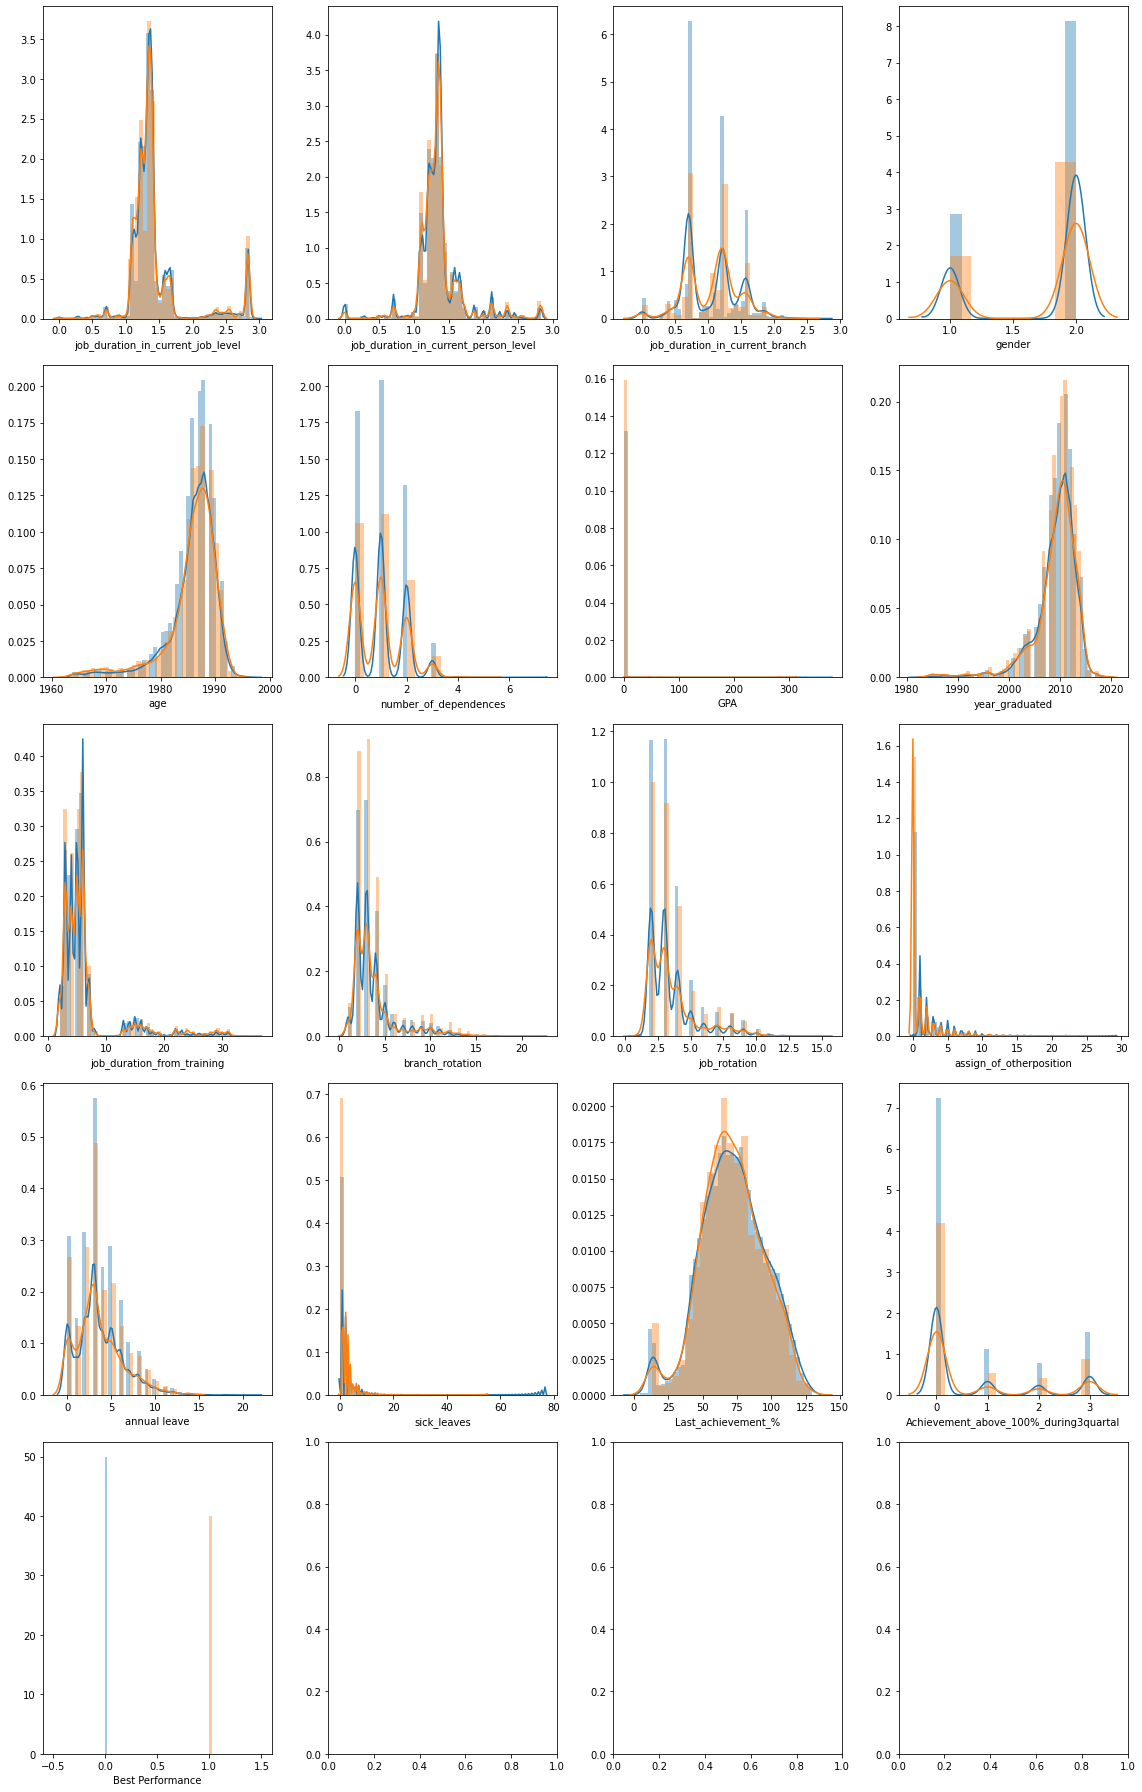

In [40]:
num_data = data.select_dtypes(exclude=['object'])
print(num_data.shape)
fig, axs = plt.subplots(5,4 ,figsize=(16,25))
col_idx = 0
for i in range(5):
    for j in range(4):
#         axs[i,j].scatter(x=num_data[num_data.columns[col_idx]],y=num_data['Best Performance'],color =random.choice(['red','blue','green','yellow']) )
        sns.distplot(num_data[num_data['Best Performance']==0].iloc[:,col_idx],label='0',ax=axs[i,j])
        sns.distplot(num_data[num_data['Best Performance']==1].iloc[:,col_idx],label='1',ax=axs[i,j])
        col_idx+=1
        if col_idx==17:
            break
plt.tight_layout()
plt.show()

In [181]:
# print(num_data[num_data['GPA']>4].shape)
# num_data[num_data['GPA']>4].sort_values('GPA',ascending=False)

GPA kinda weird > 4 52 rows


## Check Colinearity

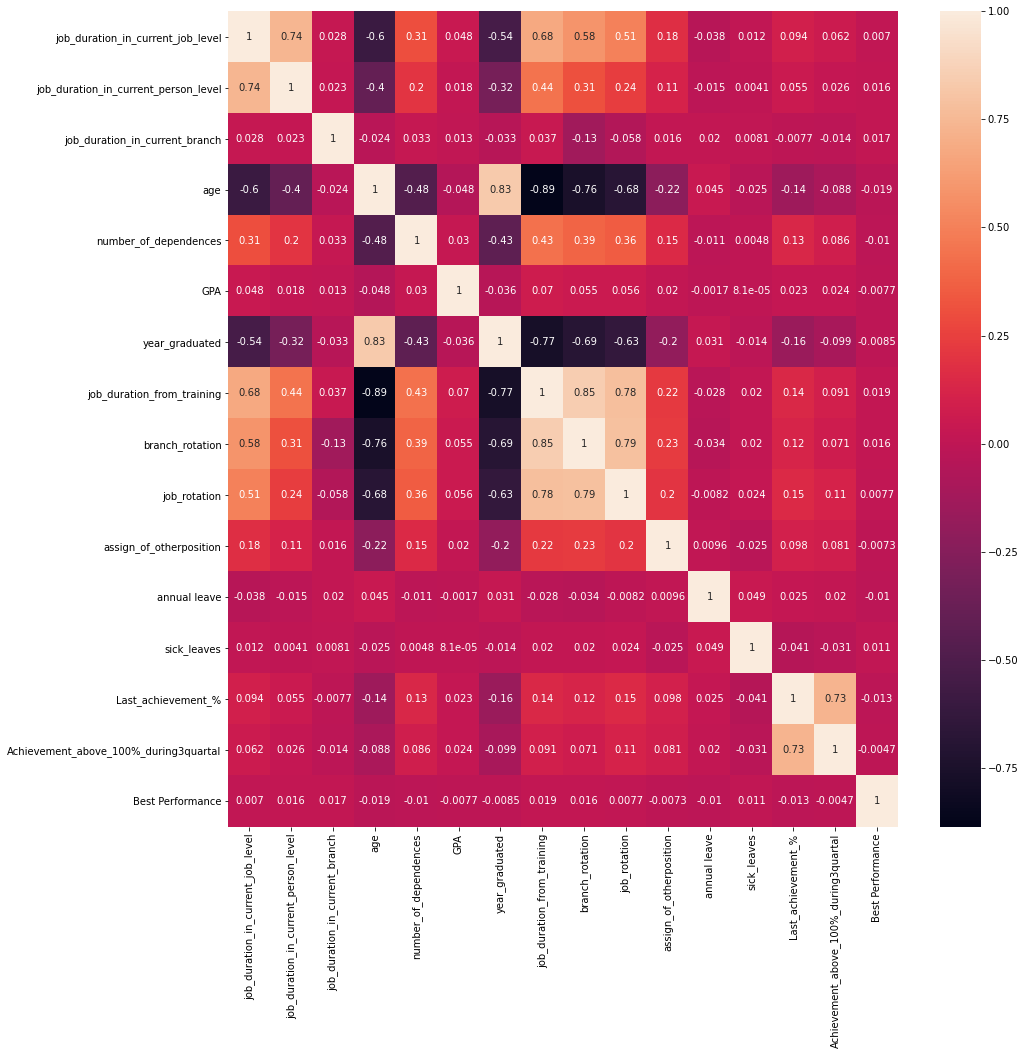

In [184]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),
            annot=True
           )
plt.show()

In [21]:
matrix_corr = data.corr()

In [22]:
high_correlation_features = []
threshold = 0.8


for i,col in enumerate(matrix_corr.iloc[:-1,:-1].columns):  # exclude target
    if col=='Best Performance':
        continue
    for j in range(len(matrix_corr.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if np.abs(matrix_corr.iloc[i,j])>=threshold:
                print(matrix_corr.columns[i] + ' ' +matrix_corr.columns[j] + ' Highly Correlated')
                print(matrix_corr.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr.columns[i],matrix_corr.columns[j]])

year_graduated age Highly Correlated
0.8339015866998329

job_duration_from_training age Highly Correlated
-0.8851091167947067

branch_rotation job_duration_from_training Highly Correlated
0.8480636832446575



Perhaps Age should be dropped, job_duration_from_training 

In [23]:
high_correlation_features

[['year_graduated', 'age'],
 ['job_duration_from_training', 'age'],
 ['branch_rotation', 'job_duration_from_training']]

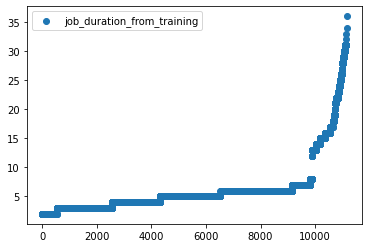

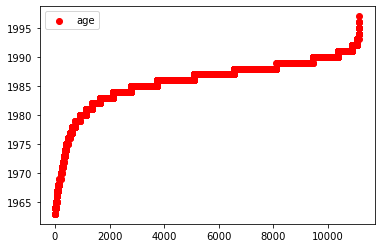

In [24]:
idx = 1
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[idx][0]].sort_values(),label=high_correlation_features[idx][0])
plt.legend()
plt.show()
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[idx][1]].sort_values(),label=high_correlation_features[idx][1],color='red')
plt.legend()
plt.show()


In [62]:
import scipy.stats as ss


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]   # return chi2, pvalue, degrees of freedom, expected value
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# matrix_corr_categ = categ_data.iloc[:,:2].corr(method = cramers_v)
# matrix_corr_categ
matrix_corr_categ = pd.DataFrame(index = categ_data.columns)
for col in categ_data.columns:
    corr = []
    for col2 in categ_data.columns:
        corr.append(cramers_v(data[col].fillna('nan'),data[col2].fillna('nan')))
    matrix_corr_categ[col] = corr
matrix_corr_categ


,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
job_level,1.000000,0.992022,0.121256,0.087713,0.129538
person_level,0.992022,1.000000,0.164040,0.122962,0.108174
Employee_type,0.121256,0.164040,1.000000,0.125009,0.008476
marital_status_maried(Y/N),0.087713,0.122962,0.125009,0.999645,0.000000
Education_level,0.129538,0.108174,0.008476,0.000000,1.000000


In [63]:
high_correlation_features = []
threshold = 0.8


for i,col in enumerate(matrix_corr_categ.iloc[:-1,:-1].columns):  # exclude target
    if col=='Best Performance':
        continue
    for j in range(len(matrix_corr_categ.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if matrix_corr_categ.iloc[i,j]>=threshold:
                print(matrix_corr_categ.columns[i] + ' ' +matrix_corr_categ.columns[j] + ' Highly Correlated')
                print(matrix_corr_categ.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr_categ.columns[i],matrix_corr_categ.columns[j]])

person_level job_level Highly Correlated
0.9920215200793246



In [64]:
for cols in high_correlation_features:
    print(pd.crosstab(categ_data[cols[0]],data['Best Performance']))
    print()
    print(pd.crosstab(categ_data[cols[1]],data['Best Performance']))
    print('===========\n')

Best Performance     0     1
person_level                
PG01                14     5
PG02                13     3
PG03              8233  1422
PG04               656   101
PG05               276    32
PG06               307    71
PG07                17     2
PG08                 0     1

Best Performance     0     1
job_level                   
JG03                28     8
JG04              8890  1523
JG05               598   106



person level / job level should be dropped

## Target

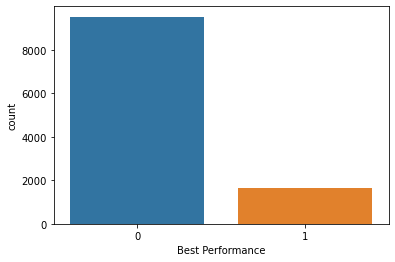

In [67]:
sns.countplot(data['Best Performance'])

# Preprocess

In [484]:


data['gender'] = data['gender'].astype('str')
data_test['gender'] = data_test['gender'].astype('str')

data = data.rename(columns={'annual leave':'annual_leave'})
data_test = data_test.rename(columns={'annual leave':'annual_leave'})

data = data.rename(columns={'Last_achievement_%':'Last_achievement'})
data_test = data_test.rename(columns={'Last_achievement_%':'Last_achievement'})



In [485]:
# get test data (for final evaluation)
X_train = data.drop(columns=['Best Performance'])
y_train = data['Best Performance']


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# baseline

In [10]:
def fast_build_model(num_cols,cat_cols,features,X,y,cv,model=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ])


    main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model)])
    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []

    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        X_train = X.iloc[train_index,:]
        y_train = y.iloc[train_index]
        X_val = X.iloc[val_index,:]
        y_val = y.iloc[val_index]
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return pipelines


def fast_predict(X,pipelines):
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        pred_proba += pipelines[i].predict_proba(X)[:,1] / len(pipelines)
    
    return pred_proba
        

In [11]:
num_cols = list(X_train.select_dtypes(exclude=['object']))
cat_cols = list(X_train.select_dtypes(include=['object']))
features = list(X_train.columns)

In [12]:
len(features), len(num_cols), len(cat_cols)

(21, 15, 6)

## logreg

In [372]:
cv = 5
pipelines_logreg = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=LogisticRegression(class_weight='balanced'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

Fit iteration 0 done in : 0.22999858856201172
Fit iteration 1 done in : 0.18000006675720215


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Fit iteration 2 done in : 0.19000005722045898
Fit iteration 3 done in : 0.18700098991394043

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Fit iteration 4 done in : 0.19211554527282715
PRec Rec AUC average : [0.8627418  0.15764209] [0.53898697 0.50152718] <==> 0.5300845593814539


In [30]:
# pred_proba = fast_predict(X_val,pipelines)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

## XGBClassifier

In [31]:
cv = 5
pipelines_XGB = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=XGBClassifier(scale_pos_weight =3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 0.6109962463378906
[21:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 1 done in : 0.5889995098114014
[21:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 2 done in : 0.5269970893859863
[21:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 3 done in : 0.5730023384094238
[21:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 4 done in : 0.5679976940155029
PRec Rec AUC average : [0.85660559 0.19157088] [0.93348045 0.09163103] <==> 0.5380613829057603


In [32]:
# pred_proba = fast_predict(X_val,pipelines_XGB)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

In [34]:
X_train2 = X_train.copy()
# X_val2 = X_val.copy()
X_train2['GPA'] = np.where(X_train2['GPA']>4,4,X_train2['GPA'])
# X_val2['GPA'] = np.where(X_val2['GPA']>4,4,X_val2['GPA'])

X_train2 = X_train2.drop(columns=['age','person_level','job_duration_from_training'])
# X_val2 = X_val2.drop(columns=['age','person_level','job_duration_from_training'])

num_cols2 = list(X_train2.select_dtypes(exclude='object').columns)
cat_cols2 = list(X_train2.select_dtypes(include='object').columns)
features2 = num_cols2.copy()
features2.extend(cat_cols2)

In [35]:
cv = 5
pipelines_XGB2 = fast_build_model(num_cols2,cat_cols2,features2,X_train2,y_train,cv,model=XGBClassifier(scale_pos_weight =3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 0.44896912574768066
[21:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 1 done in : 0.467998743057251
[21:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 2 done in : 0.49900007247924805
[21:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 3 done in : 0.46700000762939453
[21:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 4 done in : 0.5069994926452637
PRec Rec AUC average : [0.85693501 0.19217082] [0.92843632 0.09896151] <==> 0.5384088669874844


In [36]:
len(features2), len(num_cols2), len(cat_cols2)

(18, 13, 5)

In [40]:
# pred_proba = fast_predict(X_val2,pipelines_XGB2)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

In [41]:
X_test = data_test.copy()
X_test['GPA'] = np.where(X_test['GPA']>4,4,X_test['GPA'])
X_test = X_test.drop(columns=['age','person_level','job_duration_from_training'])

In [212]:
pred_proba = fast_predict(X_test,pipelines_XGB2)


In [213]:
df_submission = pd.DataFrame({'index':X_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.199513
1,1,0.342040
2,2,0.463371
3,3,0.091576
4,4,0.165634
...,...,...
5995,5995,0.239684
5996,5996,0.104323
5997,5997,0.048302
5998,5998,0.186930


In [214]:
df_submission.to_csv('df_submission_9feb_XGBclassifier_2.csv',index=False)

# FE

In [303]:
class Feature_Engineering:
    def __init__(self,parameters):
        self.parameters = parameters
        self.target = parameters['target']
    
    @staticmethod  
    def check_col(col):
        if len(col.split(' '))>1:
            col2 = '_'.join(col.split(' '))
        else:
            col2 = col
        return col2
    
    @staticmethod
    def get_bin(data,col,n_bin,mode='cut'):
        while True:
            try:
                if mode=='cut':
                    _,bin_dummy = pd.cut(data[col],n_bin,retbins=True)
                else:
                    _,bin_dummy = pd.qcut(data[col],n_bin,retbins=True)
            except:
                n_bin -= 1
                continue
            break
        return bin_dummy
        
    def fit(self,data_ori):
        target = self.target
        data = data_ori.copy()
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_qcut',bin_dummy)
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_cut',bin_dummy)
            
            
        for param in self.parameters['bin_add_categ_numer_bin_qcut']:
            col = param[1]
            n_bin = param[2]
            print(col)
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut_add_categ',bin_dummy)
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_cut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_cut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_cut',data_dummy)
            
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            n_bin = param[1]
            print(col)
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_qcut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_qcut',data_dummy)
           
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bins = param[1]
            setattr(self,f'{col}_bin_custom_bin',bins)
            
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bins)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_custom_bin'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_custom_bin',data_dummy)
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data_dummy = data.groupby([f'{col}_categorical_mean_encoding'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_categorical_mean_encoding',data_dummy)
        
        
        
        self.fit = True
        return data
        
    
    def transform(self,data,mode='train'):
        target = self.target
        if mode!='train':
            target_encode = self.target
        else:
            target_encode = self.target +"_y"
            
        if self.fit==False:
            raise Exception("Fit to train data first")
        
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_qcut')
            data[f'{col}_bin_numer_qcut'] = pd.cut(data[col],bins=bin_dummy).astype(str)
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_cut')
            data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str)
            
        for cols in self.parameters['bin_add_categ_numer_bin_qcut']:
            col_add = cols[0] + '_' + cols[1]
            bin_dummy = eval(f'self.{cols[1]}_bin_qcut_add_categ')
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_cut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_cut')
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_qcut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_qcut')
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_custom_bin')
            data_dummy = eval(f'self.{col}_bin_target_encoding_custom_bin')
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_custom_bin'])[f'{target_encode}'].values
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data_dummy = eval(f'self.{col}_categorical_mean_encoding')
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data[f'{col}_categorical_mean_encoding'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_categorical_mean_encoding'])[f'{target_encode}'].values
        
        
        for cols in self.parameters['multiply']:
            data[cols[0] + 'x' +cols[1]] = data[cols[0]] * data[cols[1]]
        for cols in self.parameters['add']:
            data[cols[0] + '+' +cols[1]] = data[cols[0]] + data[cols[1]]
        for cols in self.parameters['add_str']:
            data[cols[0] + '+' +cols[1]] = data[cols[0]].astype(str)+'_' + data[cols[1]].astype(str)
            
        for cols in self.parameters['substract']:
            data[cols[0] + '-' +cols[1]] = data[cols[0]] - data[cols[1]]
        for cols in self.parameters['divide']:
            data[cols[0] + '/' +cols[1]] = data[cols[0]] / np.where(data[cols[1]]==0,0.0001,data[cols[1]])
        
        
        
        
        return data
    
    

In [304]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement',
 'Achievement_above_100%_during3quartal']

In [305]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level']

In [306]:


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[['GPA',10]],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'
             
            
            }
data2 = data.loc[X_train.index].copy()
data2 = data2.rename(columns={'annual leave':'annual_leave'})

add_fe = Feature_Engineering(parameters)
add_fe.fit(data2)
data2_fe = add_fe.transform(data2)




GPA
GPA
year_graduated
GPA
annual_leave


In [307]:
data2_fe.iloc[:,-15:]

,Best Performance,GPA_bin_numer_qcut,job_level_GPA_bin_add_categ_numer_bin_qcut,Education_level_GPA_bin_add_categ_numer_bin_qcut,year_graduated_bin_target_encoding_qcut,GPA_bin_target_encoding_qcut,annual_leave_bin_target_encoding_qcut,job_level_categorical_mean_encoding,person_level_categorical_mean_encoding,Employee_type_categorical_mean_encoding,Education_level_categorical_mean_encoding,GPAxnumber_of_dependences,annual_leave+sick_leaves,assign_of_otherposition+branch_rotation,Education_level+job_level
0,0,"(2.66, 3.0]","JG04_(2.66, 3.0]","level_0_(2.66, 3.0]",0.149194,0.148230,0.147887,0.146259,0.147281,0.141348,0.000000,2.86,3,4,level_0_JG04
1,0,"(3.32, inf]","JG04_(3.32, inf]","level_1_(3.32, inf]",0.146625,0.137610,0.154563,0.146259,0.147281,0.141348,0.192857,0.00,1,4,level_1_JG04
2,0,"(-0.001, 2.66]","JG05_(-0.001, 2.66]","level_1_(-0.001, 2.66]",0.146625,0.156013,0.154563,0.150568,0.187831,0.141975,0.192857,0.00,3,16,level_1_JG05
3,1,"(-0.001, 2.66]","JG05_(-0.001, 2.66]","level_1_(-0.001, 2.66]",0.146625,0.156013,0.143847,0.150568,0.187831,0.141348,0.192857,0.00,14,11,level_1_JG05
4,0,"(3.32, inf]","JG05_(3.32, inf]","level_1_(3.32, inf]",0.146625,0.137610,0.147887,0.150568,0.187831,0.141348,0.192857,21.60,3,11,level_1_JG05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.160437,0.137610,0.143847,0.146259,0.147281,0.141348,0.139535,3.33,5,3,level_5_JG04
11149,0,"(2.66, 3.0]","JG04_(2.66, 3.0]","level_5_(2.66, 3.0]",0.160437,0.148230,0.132110,0.146259,0.147281,0.159172,0.139535,6.00,6,1,level_5_JG04
11150,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.160437,0.137610,0.143847,0.146259,0.147281,0.159172,0.139535,0.00,4,1,level_5_JG04
11151,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.130695,0.137610,0.143847,0.146259,0.147281,0.141348,0.139535,3.53,5,5,level_5_JG04


In [275]:
data2_fe.isnull().sum()

job_level                                           0
job_duration_in_current_job_level                   0
person_level                                        0
job_duration_in_current_person_level                0
job_duration_in_current_branch                      0
Employee_type                                       0
gender                                              0
age                                                 0
marital_status_maried(Y/N)                          0
number_of_dependences                               0
Education_level                                     0
GPA                                                 0
year_graduated                                      0
job_duration_from_training                          0
branch_rotation                                     0
job_rotation                                        0
assign_of_otherposition                             0
annual_leave                                        0
sick_leaves                 

In [177]:
data2_fe.shape

(11153, 32)

## Model with FE

In [166]:
def fast_build_model_FE(X,y,cv,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)
        
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        print(num_cols_fe)
        print(cat_cols_fe)
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        
        add_fes.append(add_fe)
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return add_fes,pipelines


def fast_predict_FE(X,add_fes,pipelines):
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(X,mode='test'))[:,1] / len(pipelines)
    
    return pred_proba
        

In [167]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement',
 'Achievement_above_100%_during3quartal']

In [168]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level']

In [169]:
data['job_duration_in_current_branch'].describe()

count    11153.000000
mean         1.034646
std          0.416723
min          0.000000
25%          0.707107
50%          1.118034
75%          1.224745
max          2.677686
Name: job_duration_in_current_branch, dtype: float64

In [212]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}


parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}


### XGB

In [203]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[22:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.3139991760253906
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[22:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.5519983768463135
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[22:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.542999505996704
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[22:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.5679998397827148
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[22:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.4679992198944092
PRec Rec AUC average : [0.85815397 0.20738975] [0.9301177 0.106292 ] <==> 0.5492126176329587


In [32]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[00:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.3919994831085205
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[00:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.5519979000091553
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[00:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.3970012664794922
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.3699994087219238
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[00:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.245332956314087
PRec Rec AUC average : [0.85815397 0.20738975] [0.9301177 0.106292 ] <==> 0.5492126176329587


In [23]:
pred_proba = fast_predict_FE(data_test,add_fes,pipelines)

In [24]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.101839
1,1,0.208248
2,2,0.555681
3,3,0.094393
4,4,0.228342
...,...,...
5995,5995,0.232385
5996,5996,0.035990
5997,5997,0.129282
5998,5998,0.163177


In [25]:
# df_submission.to_csv('df_submission_10feb_XGBclassifier_FE.csv',index=False)

### Logreg

In [204]:
# cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced',random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.6959569454193115
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_ca

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 1 done in : 0.7169995307922363
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_ca

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.7670001983642578
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_ca

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 3 done in : 0.7008166313171387
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'job_level_GPA_bin_add_ca

<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6859996318817139
PRec Rec AUC average : [0.86192246 0.15570494] [0.51166456 0.52351863] <==> 0.5251128344301582


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.6580028533935547
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 1 done in : 0.6779980659484863
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.6340024471282959
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 3 done in : 0.6349983215332031
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6180019378662109
PRec Rec AUC average : [0.86192246 0.15570494] [0.51166456 0.52351863] <==> 0.5251128344301582


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LGBM

In [206]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

year_graduated
GPA
annual_leave
(8922, 25) (11153, 22)
(2231, 25) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'GPAxnumber_of_dependences']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']
Fit iteration 0 done in : 0.3619716167449951
year_graduated
GPA
annual_leave
(8922, 25) (11153, 22)
(2231, 25) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_trainin

<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
<ipython-input-17-518b36e9bc92>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Fit iteration 1 done in : 0.37999796867370605
year_graduated
GPA
annual_leave
(8922, 25) (11153, 22)
(2231, 25) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'GPAxnumber_of_dependences']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']


<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
<ipython-input-17-518b36e9bc92>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Fit iteration 2 done in : 0.4109992980957031
year_graduated
GPA
annual_leave
(8923, 25) (11153, 22)
(2230, 25) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'GPAxnumber_of_dependences']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']


<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
<ipython-input-17-518b36e9bc92>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Fit iteration 3 done in : 0.40600085258483887
year_graduated
GPA
annual_leave
(8923, 25) (11153, 22)
(2230, 25) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'GPAxnumber_of_dependences']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']


<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
<ipython-input-17-518b36e9bc92>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Fit iteration 4 done in : 0.3969998359680176
PRec Rec AUC average : [0.85778866 0.23738318] [0.95712484 0.07758094] <==> 0.5556014973206558


In [27]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.7319755554199219
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2231, 34) (11153, 22)
Fit iteration 1 done in : 0.6710000038146973
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.6429998874664307
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2230, 34) (11153, 22)
Fit iteration 3 done in : 0.643000602722168
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6579952239990234
PRec Rec AUC average : [0.85608267 0.20669291] [0.95765027 0.06414172] <==> 0.5499872189025177


### Random Forrest Tree

In [30]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(class_weight='balanced'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 1.8259966373443604
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2231, 34) (11153, 22)
Fit iteration 1 done in : 1.912001609802246
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 1.8840346336364746
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 3 done in : 1.9979994297027588
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 2.099205732345581
PRec Rec AUC average : [0.8532867 0.5      ] [9.99894914e-01 6.10873549e-04] <==> 0.5338206712521982


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### MLP Classifier Tree

In [51]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=MLPClassifier(hidden_layer_sizes=(100,),activation='identity'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 1.070002794265747
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 1 done in : 1.0839998722076416
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 1.283998966217041
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 3 done in : 1.0930016040802002
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 1.2739999294281006
PRec Rec AUC average : [0.85357947 0.22916667] [0.99611181 0.00671961] <==> 0.5250362505562441


### Kneighbors

In [54]:
# cv=5
# add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
#                     Feature_Engineering,parameters,model_base=KNeighborsClassifier())

### SVC

In [57]:
# cv=5
# add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
#                     Feature_Engineering,parameters,model_base=SVC(class_weight='balanced',probability=True))

In [84]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level']

# ensemble

In [308]:
class Ensemble_Models():
    def __init__(self,list_models):
        self.list_models = list_models
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        num_cols_fe = list(X.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X.select_dtypes(include='object').columns)
        
        
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols_fe),
                ('cat', cat_transformer, cat_cols_fe)
            ])
        pipelines=[]
        for mod in self.list_models:
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            model = clone(main_pipeline)
            model.fit(X,y)
            pipelines.append(model)
        
        self.pipelines = pipelines
        
    def predict_proba(self,X):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
            
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [481]:
def fast_build_model_FE_ensemble(X,y,cv,Feature_Engineering,parameters,list_models=[]):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
#         X_train = data_train.drop(columns=[parameters['target']])
    
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
#         X_val = X.iloc[val_index,:]
    
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Ensemble_Models(list_models)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return add_fes,pipelines


def fast_predict_FE_ensemble(X,add_fes,pipelines):
    data = X.copy()
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(data,mode='test')) / len(pipelines)
    
    return pred_proba
        

In [310]:
list_models = [
    LogisticRegression(class_weight='balanced',random_state = 0),
    XGBClassifier(scale_pos_weight=3,random_state = 0),
    LGBMClassifier(scale_pos_weight=3,random_state = 0),
    RandomForestClassifier(class_weight='balanced',random_state = 0),
    MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state = 0)
]



In [328]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}

parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[['GPA',30]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}

In [329]:
cv=10
add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(10037, 22) (11153, 22)
(1116, 22) (11153, 22)


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 5.056969165802002
(10037, 22) (11153, 22)
(1116, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 4.507001161575317
(10037, 22) (11153, 22)
(1116, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 4.655001401901245
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 4.77599835395813
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 4.985999822616577
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 5 done in : 4.682998418807983
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 6 done in : 4.827001571655273
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 7 done in : 4.984997272491455
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 8 done in : 5.722999095916748
(10038, 22) (11153, 22)
(1115, 22) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (

[23:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 9 done in : 5.064998388290405
PRec Rec AUC average : [0.85361251 0.32      ] [0.99821354 0.00488699] <==> 0.5676602156468364


In [137]:
# import pickle
# with open("pipelines_0567_ensembleFE.pkl", "wb") as f:
#     pickle.dump(pipelines, f)

In [224]:
pipelines[0].pipelines[0]['transformer'].transform(data2_fe.drop(columns=['Best Performance']).copy()).shape

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


(11153, 36)

In [109]:
pipelines[0].pipelines[0]['transformer']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['job_duration_in_current_job_level',
                                  'job_duration_in_current_person_level',
                                  'job_duration_in_current_branch', 'age',
                                  'number_of_dependences', 'GPA',
                                  'year_graduated',
                                  'job_duration_from_training',
                                  'branch_rotation', 'job_rotation',
                                  'assign_of_otherposition', 'annual_leave',
                                  'sick_leaves', 'Last_achievement',
                                  'Achievement_above_100%_during3quartal']),
                                ('cat',
 

In [110]:
data2_fe.shape

(11153, 35)

In [37]:
cv=10
add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(10037, 34) (11153, 22)
(1116, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 4.46696925163269
GPA
GPA
year_graduated
GPA
annual_leave
(10037, 34) (11153, 22)
(1116, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 4.761957168579102
GPA
GPA
year_graduated
GPA
annual_leave
(10037, 34) (11153, 22)
(1116, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 4.810614109039307
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 5.199998617172241
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 5.170146942138672
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 5 done in : 5.038998603820801
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 6 done in : 5.531000852584839
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 7 done in : 5.623890399932861
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 8 done in : 5.211998224258423
GPA
GPA
year_graduated
GPA
annual_leave
(10038, 34) (11153, 22)
(1115, 34) (11153, 22)


<ipython-input-17-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-17-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-17-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[21:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 9 done in : 5.240000247955322
PRec Rec AUC average : [0.85360158 0.36842105] [0.99873897 0.00427611] <==> 0.5667799183601782


In [42]:
len(add_fes)

10

In [43]:
pred_proba = fast_predict_FE_ensemble(data_test,add_fes,pipelines)

In [44]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.229486
1,1,0.263002
2,2,0.394215
3,3,0.209314
4,4,0.255185
...,...,...
5995,5995,0.230945
5996,5996,0.178085
5997,5997,0.248813
5998,5998,0.214198


In [45]:
# df_submission.to_csv('df_submission_12feb_Ensemble_FE.csv',index=False)

In [113]:
15+22

37

In [112]:
len(num_cols)

15

# Stacking

In [332]:
class Stacking_Models():
    def __init__(self,list_models,final_model):
        self.list_models = list_models
        self.final_model = final_model
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        num_cols_fe = list(X.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X.select_dtypes(include='object').columns)
        
        
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols_fe),
                ('cat', cat_transformer, cat_cols_fe)
            ])
        pipelines=[]
        
        pred_proba={}
        for i,mod in enumerate(self.list_models):
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            model = clone(main_pipeline)
            model.fit(X,y)
            
            pred_proba[i] = model.predict_proba(X)[:,1]
            
            pipelines.append(model)
        
        self.pipelines = pipelines
        
        
        self.final_model.fit(pd.DataFrame(pred_proba),y)
        
        
    def predict_proba(self,X):
        pred_proba={}
        for i,pipe in enumerate(self.pipelines):
            pred_proba[i] = pipe.predict_proba(X)[:,1]
        
        predict_proba = self.final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        pred_proba={}
        for i,pipe in enumerate(self.pipelines):
            pred_proba[i] = pipe.predict_proba(X)[:,1]
        
        predict_proba = self.final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [486]:
def fast_build_model_FE_stacking(X,y,cv,Feature_Engineering,parameters,list_models=[],final_model=''):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Stacking_Models(list_models,final_model)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return add_fes,pipelines


def fast_predict_FE_stacking(X,add_fes,pipelines):
    data = X.copy()
    predict_proba = np.zeros(len(X))
#     pred_proba={}
    for i,pipe in enumerate(pipelines):
        predict_proba += pipe.predict_proba(add_fes[i].transform(data,mode='test')) / len(pipelines)
        
#     predict_proba = final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
    
    return predict_proba
        

In [470]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}

parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[['GPA',30]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','Employee_type'],
             'target':'Best Performance'}

In [459]:
list_models = [
    LogisticRegression(class_weight='balanced',random_state=0),
    XGBClassifier(scale_pos_weight=3,random_state=0),
    LGBMClassifier(scale_pos_weight=5,random_state=0),
    RandomForestClassifier(class_weight='balanced',random_state=0),
    MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state=0)
]

final_model = LogisticRegression(class_weight='balanced',random_state=0)
# final_model = DecisionTreeClassifier(class_weight='balanced')

In [460]:
cv=10
add_fes,pipelines = fast_build_model_FE_stacking(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models,final_model=final_model)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

(10037, 24) (11153, 22)
(1116, 24) (11153, 22)


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 5.280473709106445
(10037, 24) (11153, 22)
(1116, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 5.06136679649353
(10037, 24) (11153, 22)
(1116, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 5.706999063491821
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 5.849042892456055
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 5.638001441955566
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 5 done in : 6.621597766876221
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 6 done in : 5.873998165130615
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 7 done in : 6.081933259963989
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 8 done in : 6.608001947402954
(10038, 24) (11153, 22)
(1115, 24) (11153, 22)


<ipython-input-303-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-303-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-303-3e64f3dfca2c>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

[00:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 9 done in : 5.672001123428345
PRec Rec AUC average : [0.85549872 0.26829268] [0.98423707 0.03359805] <==> 0.5699774395334046


In [435]:
5684
0.5699619686921529

5684

In [480]:
data_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,annual_leave_bin_target_encoding_qcut,job_level_categorical_mean_encoding,person_level_categorical_mean_encoding,Employee_type_categorical_mean_encoding,Education_level_categorical_mean_encoding,GPAxnumber_of_dependences,annual_leave+sick_leaves,assign_of_otherposition+branch_rotation,Education_level+job_level,GPA_bin_target_encoding_cut
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,0.149316,0.146912,0.147532,0.141280,0.150316,0.00,10,10,level_3_JG04,0.146885
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,0.154794,0.146912,0.147532,0.159757,0.145276,0.00,1,2,level_4_JG04,0.146885
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,0.154794,0.146912,0.147532,0.141280,0.145276,3.44,3,2,level_4_JG04,0.146885
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.149316,0.146912,0.147532,0.141280,0.145276,0.00,3,1,level_4_JG04,0.146885
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,0.149316,0.146912,0.147532,0.159757,0.145276,0.00,3,3,level_4_JG04,0.146885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,0.141724,0.146912,0.147532,0.159757,0.145276,0.00,4,2,level_4_JG04,0.146885
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,0.149316,0.146912,0.147532,0.141280,0.145276,3.56,3,10,level_4_JG04,0.146885
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,0.143699,0.146912,0.147532,0.141280,0.145276,0.00,16,2,level_4_JG04,0.146885
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,0.154794,0.140704,0.101124,0.141280,0.145276,5.86,2,15,level_4_JG05,0.146885


In [487]:
pred_proba = fast_predict_FE_stacking(data_test,add_fes,pipelines)

In [488]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.009296
1,1,0.016149
2,2,0.474859
3,3,0.005588
4,4,0.007457
...,...,...
5995,5995,0.010019
5996,5996,0.003456
5997,5997,0.021672
5998,5998,0.062398


In [491]:
df_submission.to_csv('df_submission_12feb_Stacking_FE.csv',index=False)

In [490]:
df_submission.describe()

,index,Best Performance
count,6000.000000,6000.000000
mean,2999.500000,0.050739
std,1732.195139,0.093216
min,0.000000,0.000512
25%,1499.750000,0.006512
50%,2999.500000,0.017554
75%,4499.250000,0.050018
max,5999.000000,0.857168


# Using Mix add_fe and NOT

In [53]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement',
 'Achievement_above_100%_during3quartal']

In [ ]:
class Ensemble_Models_mix():
    def __init__(self,list_models_features):
        self.list_models = list_models_features['models']
        self.features = list_models_features['features']
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols),
                ('cat', cat_transformer, cat_cols)
            ])
        pipelines=[]
        for i,mod in enumerate(self.list_models):
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            
            
            model = clone(main_pipeline)
            model.fit(X[self.features[i]],y)
            pipelines.append(model)
        
        self.pipelines = pipelines
        
    def predict_proba(self,X):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
            
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [ ]:
def fast_build_model_FE_ensemble_mix(X,y,cv,Feature_Engineering,parameters,list_models_features=[]):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Ensemble_Models_mix(list_models_features)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return add_fes,pipelines


def fast_predict_FE_ensemble(X,add_fes,pipelines):
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(X,mode='test')) / len(pipelines)
    
    return pred_proba
        

In [52]:
features_nofe = ['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual_leave', 'sick_leaves',
       'Last_achievement', 'Achievement_above_100%_during3quartal']
features_fe = ['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual_leave', 'sick_leaves',
       'Last_achievement', 'Achievement_above_100%_during3quartal',
       'Best Performance', 'job_level_GPA_bin_add_categ_numer_bin_qcut',
       'Education_level_GPA_bin_add_categ_numer_bin_qcut',
       'year_graduated_bin_target_encoding_qcut',
       'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut',
       'job_level_categorical_mean_encoding',
       'person_level_categorical_mean_encoding',
       'Employee_type_categorical_mean_encoding',
       'Education_level_categorical_mean_encoding',
       'GPAxnumber_of_dependences', 'annual_leave+sick_leaves',
       'assign_of_otherposition+branch_rotation', 'Education_level+job_level']


list_models_features = {'model':[
                    LogisticRegression(class_weight='balanced'),
                    XGBClassifier(scale_pos_weight=3),
                    LGBMClassifier(scale_pos_weight=3),
                    RandomForestClassifier(class_weight='balanced'),
                    MLPClassifier(hidden_layer_sizes=(100,),activation='identity'),
                    LogisticRegression(class_weight='balanced'),
                    XGBClassifier(scale_pos_weight=3),
                    LGBMClassifier(scale_pos_weight=3),
                    RandomForestClassifier(class_weight='balanced'),
                    MLPClassifier(hidden_layer_sizes=(100,),activation='identity')
                ],
               'features':[
                   features_nofe,
                   features_nofe,
                   features_nofe,
                   features_nofe,
                   features_nofe,
                   features_fe,
                   features_fe,
                   features_fe,
                   features_fe,
                   features_fe
               ]
               
}


# Using Transform Yeo Johnson

In [51]:
data2_fe.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual_leave', 'sick_leaves',
       'Last_achievement', 'Achievement_above_100%_during3quartal',
       'Best Performance', 'job_level_GPA_bin_add_categ_numer_bin_qcut',
       'Education_level_GPA_bin_add_categ_numer_bin_qcut',
       'year_graduated_bin_target_encoding_qcut',
       'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut',
       'job_level_categorical_mean_encoding',
       'person_level_categorical_mean_encoding',
       'Employee_type_categorical_mean_encoding',
       'Education_level_categorical_mean_encoding',
       'GPAxnumber_of_depend

- yeo johnson transformation
- Kmeans / DBSCAn
- Remove Outlier
- Tuning
- Rule based for more specialized model
- Using no Add fe and ensemble of add _fe etc